# Deep Learning
## Keras

In [1]:
library(keras)

In [2]:
df <- read.csv('evasao.csv')

Separando dados de treino e teste:

In [3]:
n <- nrow(df)
set.seed(42) # Se não fizer isso, verá valores diferentes dos meus
limite <- sample(1:n, size = round(0.75*n), replace = FALSE)
train_df <- df[limite,]
test_df <- df[-limite,]

In [4]:
head(test_df)

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou
3,4,0.10,0,1,1,0,8.000000,0
4,4,0.20,8,1,1,0,4.000000,1
7,9,0.10,6,1,1,1,2.000000,0
9,9,0.15,7,1,5,10,2.800000,0
11,6,0.25,5,1,3,6,2.666667,0
17,10,0.05,0,0,2,0,9.000000,0


Vamos criar o modelo Sequencial:

In [5]:

modelo <- keras_model_sequential() 
modelo %>% 
  layer_dense(units = 128, activation = 'relu', input_shape=c(7), kernel_initializer = "normal") %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 512, activation='relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units=2,activation='sigmoid')


In [6]:
summary(modelo)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 128)                     1024        
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 512)                     66048       
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 512)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 2)                       1026        
Total params: 68,098
Trainable params: 68,098
Non-trainable params: 0
_______________________________________

Compilando e treinando o modelo:

In [7]:
modelo %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = 'accuracy'
)

In [8]:
library(dplyr)
preditores_treino <- data.matrix(select(train_df, c('periodo','bolsa','repetiu','ematraso','disciplinas','faltas','desempenho')))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
head(preditores_treino)

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho
275,2,0.15,0,1,1,0,10.0
281,9,0.00,2,1,5,0,0.8
86,9,0.10,3,0,1,2,6.0
247,8,0.15,8,0,0,0,0.0
190,9,0.25,6,0,3,0,1.0
154,10,0.20,3,1,2,2,5.0


In [10]:
rotulos_treino <- to_categorical(data.matrix(select(train_df,c('abandonou'))))
head(rotulos_treino)

1,0
1,0
1,0
1,0
0,1
1,0


In [11]:
historico <- modelo %>% fit(
  preditores_treino, rotulos_treino, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)

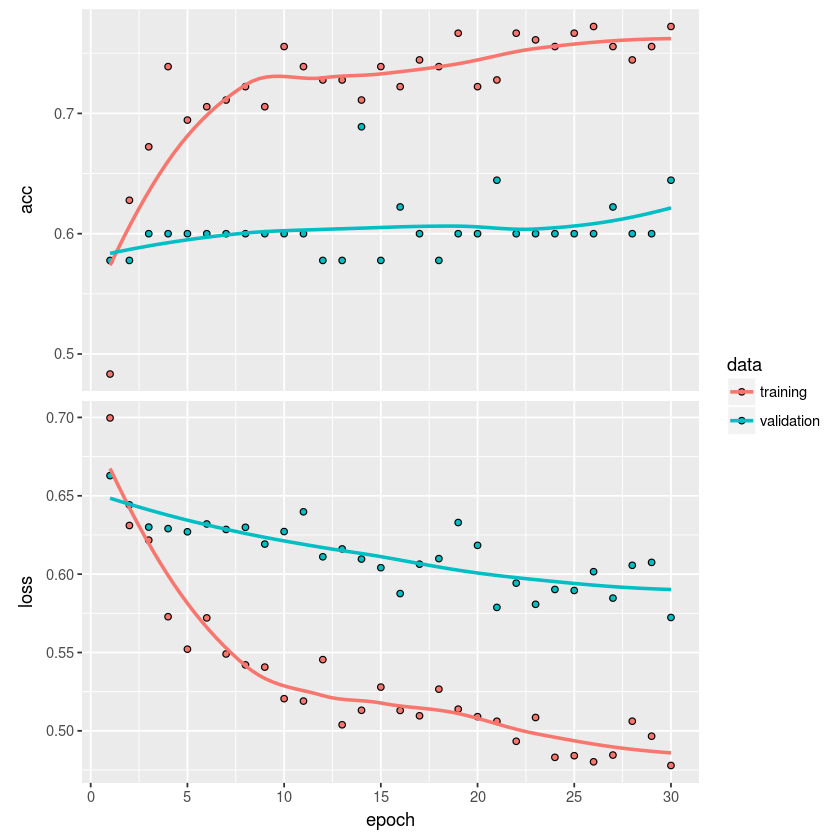

In [12]:
plot(historico)

Avaliando o modelo:

In [14]:
rotulos_teste <- to_categorical(data.matrix(select(test_df,c('abandonou'))))
head(rotulos_teste)
preditores_teste <- data.matrix(select(test_df, c('periodo','bolsa','repetiu','ematraso','disciplinas','faltas','desempenho')))
modelo %>% evaluate(preditores_teste, rotulos_teste)

1,0
0,1
1,0
1,0
1,0
1,0


$loss
[1] 0.7149635

$acc
[1] 0.6533333

In [15]:
modelo

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 128)                     1024        
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 512)                     66048       
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 512)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 2)                       1026        
Total params: 68,098
Trainable params: 68,098
Non-trainable params: 0
_________________________________

In [19]:
resultado <- modelo %>% predict_classes(preditores_teste)

In [24]:
str(resultado)

 num [1:75(1d)] 0 1 1 1 1 0 1 1 1 1 ...


In [25]:
test_df$abandonou

[1] 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0
[39] 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1

In [26]:
resultado

[1] 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
[39] 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1